In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Auction Analysis

In [3]:
Data=pd.read_csv("ipl_2022_dataset.csv")
Data

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans
...,...,...,...,...,...,...,...,...
628,628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [4]:
Data.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [5]:
Data.tail()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
628,628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
632,632,Aaron Hardie,20 Lakh,ALL-ROUNDER,NaN,NaN,NaN,Unsold


In [6]:
print("Number of Rows",Data.shape[0])
print("Number of Columns",Data.shape[1])

Number of Rows 633
Number of Columns 8


In [7]:
Data.info

<bound method DataFrame.info of      Unnamed: 0                  Player  Base Price         TYPE  \
0             0             Rashid Khan  Draft Pick       BOWLER   
1             1           Hardik Pandya  Draft Pick  ALL-ROUNDER   
2             2         Lockie Ferguson        2 Cr       BOWLER   
3             3           Rahul Tewatia     40 Lakh  ALL-ROUNDER   
4             4            Shubman Gill  Draft Pick       BATTER   
..          ...                     ...         ...          ...   
628         628            Sairaj Patil     20 Lakh       BATTER   
629         629              Monu Singh     20 Lakh       BOWLER   
630         630  Nivethan Radhakrishnan     20 Lakh       BOWLER   
631         631            Lance Morris     20 Lakh       BOWLER   
632         632            Aaron Hardie     20 Lakh  ALL-ROUNDER   

     COST IN ₹ (CR.)  Cost IN $ (000) 2021 Squad            Team  
0               15.0           1950.0        SRH  Gujarat Titans  
1               1

In [8]:
Data.describe(include="all")

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
count,633.000000,633,633,633,237.000000,237.000000,199,633
unique,NaN,629,10,4,NaN,NaN,8,11
top,NaN,Shubham Singh,20 Lakh,ALL-ROUNDER,NaN,NaN,SRH,Unsold
freq,NaN,2,344,242,NaN,NaN,26,396
mean,316.000000,NaN,NaN,NaN,3.695781,480.451477,NaN,NaN
std,182.875641,NaN,NaN,NaN,4.238092,550.951945,NaN,NaN
min,0.000000,NaN,NaN,NaN,0.200000,26.000000,NaN,NaN
25%,158.000000,NaN,NaN,NaN,0.400000,52.000000,NaN,NaN
50%,316.000000,NaN,NaN,NaN,1.900000,247.000000,NaN,NaN
75%,474.000000,NaN,NaN,NaN,6.500000,845.000000,NaN,NaN


# Data Cleaning 

In [9]:
Data.isnull().sum()

Unnamed: 0           0
Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [10]:
Data['COST IN ₹ (CR.)']=Data['COST IN ₹ (CR.)'].fillna(0)  

In [11]:
Data['Cost IN $ (000)']=Data['Cost IN $ (000)'].fillna(0)

In [12]:
Data['2021 Squad']=Data['2021 Squad'].fillna(0)

In [13]:
Data.isnull().sum()

Unnamed: 0         0
Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

In [14]:
Batters = Data.loc[(Data["TYPE"]=="BATTER")]
Batters_sold=Batters.loc[(Batters['COST IN ₹ (CR.)']>=1)]
Batters_sold


,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
4,4,Shubman Gill,Draft Pick,BATTER,8.00,1040.0,KKR,Gujarat Titans
7,7,David Miller,1 Cr,BATTER,3.00,390.0,RR,Gujarat Titans
9,9,Abhinav Sadarangani,20 Lakh,BATTER,2.60,338.0,0,Gujarat Titans
12,12,Jason Roy,2 Cr,BATTER,2.00,260.0,SRH,Gujarat Titans
27,27,Ruturaj Gaikwad,Retained,BATTER,6.00,780.0,CSK,Chennai Super Kings
31,31,Robin Uthappa,2 Cr,BATTER,2.00,260.0,CSK,Chennai Super Kings
36,36,Devon Conway,1 Cr,BATTER,1.00,130.0,0,Chennai Super Kings
50,50,Prithvi Shaw,Retained,BATTER,7.50,975.0,DC,Delhi Capitals
53,53,David Warner,2 Cr,BATTER,6.25,812.5,SRH,Delhi Capitals
56,56,Rovman Powell,75 Lakh,BATTER,2.80,364.0,0,Delhi Capitals


In [15]:
Bowlers=Data.loc[(Data["TYPE"]=="BOWLER")]
Bowlers_sold=Bowlers.loc[(Bowlers['COST IN ₹ (CR.)']>=1)]
Bowlers_sold


,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.00,1950.0,SRH,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans
5,5,Mohammad Shami,2 Cr,BOWLER,6.25,812.5,PBKS,Gujarat Titans
6,6,Yash Dayal,20 Lakh,BOWLER,3.20,416.0,0,Gujarat Titans
8,8,R. Sai Kishore,20 Lakh,BOWLER,3.00,390.0,CSK,Gujarat Titans
11,11,Alzarri Joseph,75 Lakh,BOWLER,2.40,312.0,0,Gujarat Titans
23,23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,CSK,Chennai Super Kings
33,33,Adam Milne,1.5 Cr,BOWLER,1.90,247.0,MI,Chennai Super Kings
35,35,Prashant Solanki,20 Lakh,BOWLER,1.20,156.0,0,Chennai Super Kings
48,48,Shardul Thakur,2 Cr,BOWLER,10.75,1397.5,CSK,Delhi Capitals


In [16]:
Rounder=Data.loc[(Data["TYPE"]=="ALL-ROUNDER")]
Rounder_sold=Rounder.loc[(Rounder['COST IN ₹ (CR.)']>=1)]
Rounder_sold

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.00,1950.0,MI,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.00,1170.0,RR,Gujarat Titans
14,14,Jayant Yadav,1 Cr,ALL-ROUNDER,1.70,221.0,MI,Gujarat Titans
15,15,Vijay Shankar,50 Lakh,ALL-ROUNDER,1.40,182.0,SRH,Gujarat Titans
16,16,Dominic Drakes,75 Lakh,ALL-ROUNDER,1.10,143.0,CSK,Gujarat Titans
22,22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.00,2080.0,CSK,Chennai Super Kings
25,25,Moeen Ali,Retained,ALL-ROUNDER,8.00,1040.0,CSK,Chennai Super Kings
28,28,Dwayne Bravo,2 Cr,ALL-ROUNDER,4.40,572.0,CSK,Chennai Super Kings
29,29,Shivam Dube,50 Lakh,ALL-ROUNDER,4.00,520.0,RR,Chennai Super Kings
30,30,Chris Jordan,2 Cr,ALL-ROUNDER,3.60,468.0,PBKS,Chennai Super Kings


In [17]:
Top_Batters_sold=Batters_sold.sort_values('COST IN ₹ (CR.)',ascending=False)
Top_Batters_sold

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
143,143,Rohit Sharma,Retained,BATTER,16.00,2080.0,MI,Mumbai Indians
168,168,Virat Kohli,Retained,BATTER,15.00,1950.0,RCB,Royal Challengers Bangalore
214,214,Kane Williamson,Retained,BATTER,14.00,1820.0,SRH,Sunrisers Hyderabad
71,71,Shreyas Iyer,2 Cr,BATTER,12.25,1592.5,DC,Kolkata Knight Riders
96,96,Mayank Agarwal,Retained,BATTER,12.00,1560.0,PBKS,Punjab Kings
217,217,Rahul Tripathi,40 Lakh,BATTER,8.50,1105.0,KKR,Sunrisers Hyderabad
193,193,Shimron Hetmyer,1.5 Cr,BATTER,8.50,1105.0,DC,Rajasthan Royals
100,100,Shikhar Dhawan,2 Cr,BATTER,8.25,1072.5,DC,Punjab Kings
148,148,Suryakumar Yadav,Retained,BATTER,8.00,1040.0,MI,Mumbai Indians
4,4,Shubman Gill,Draft Pick,BATTER,8.00,1040.0,KKR,Gujarat Titans


In [18]:
Top_Bowlers_sold=Bowlers_sold.sort_values('COST IN ₹ (CR.)',ascending=False)
Top_Bowlers_sold

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.00,1950.0,SRH,Gujarat Titans
23,23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,CSK,Chennai Super Kings
145,145,Jasprit Bumrah,Retained,BOWLER,12.00,1560.0,MI,Mumbai Indians
48,48,Shardul Thakur,2 Cr,BOWLER,10.75,1397.5,CSK,Delhi Capitals
192,192,Prasidh Krishna,1 Cr,BOWLER,10.00,1300.0,KKR,Rajasthan Royals
122,122,Avesh Khan,20 Lakh,BOWLER,10.00,1300.0,DC,Lucknow Super Giants
2,2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans
98,98,Kagiso Rabada,2 Cr,BOWLER,9.25,1202.5,DC,Punjab Kings
194,194,Trent Boult,2 Cr,BOWLER,8.00,1040.0,MI,Rajasthan Royals
75,75,Varun Chakaravarthy,Retained,BOWLER,8.00,1040.0,KKR,Kolkata Knight Riders


In [19]:
Top_Rounder_sold=Rounder_sold.sort_values('COST IN ₹ (CR.)',ascending=False)
Top_Rounder_sold

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
22,22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.00,2080.0,CSK,Chennai Super Kings
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.00,1950.0,MI,Gujarat Titans
72,72,Andre Russell,Retained,ALL-ROUNDER,12.00,1560.0,KKR,Kolkata Knight Riders
97,97,Liam Livingstone,1 Cr,ALL-ROUNDER,11.50,1495.0,RR,Punjab Kings
169,169,Glenn Maxwell,Retained,ALL-ROUNDER,11.00,1430.0,RCB,Royal Challengers Bangalore
171,171,Harshal Patel,2 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore
170,170,Wanindu Hasaranga,1 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore
123,123,Marcus Stoinis,Draft Pick,ALL-ROUNDER,9.20,1196.0,DC,Lucknow Super Giants
49,49,Axar Patel,Retained,ALL-ROUNDER,9.00,1170.0,DC,Delhi Capitals
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.00,1170.0,RR,Gujarat Titans


# Data Preparation

In [20]:
Top5_Batters_sold=Top_Batters_sold.nlargest(10,['COST IN ₹ (CR.)'])
Top10_Batters_sold=Top5_Batters_sold
Top10_Batters_sold

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
143,143,Rohit Sharma,Retained,BATTER,16.00,2080.0,MI,Mumbai Indians
168,168,Virat Kohli,Retained,BATTER,15.00,1950.0,RCB,Royal Challengers Bangalore
214,214,Kane Williamson,Retained,BATTER,14.00,1820.0,SRH,Sunrisers Hyderabad
71,71,Shreyas Iyer,2 Cr,BATTER,12.25,1592.5,DC,Kolkata Knight Riders
96,96,Mayank Agarwal,Retained,BATTER,12.00,1560.0,PBKS,Punjab Kings
217,217,Rahul Tripathi,40 Lakh,BATTER,8.50,1105.0,KKR,Sunrisers Hyderabad
193,193,Shimron Hetmyer,1.5 Cr,BATTER,8.50,1105.0,DC,Rajasthan Royals
100,100,Shikhar Dhawan,2 Cr,BATTER,8.25,1072.5,DC,Punjab Kings
148,148,Suryakumar Yadav,Retained,BATTER,8.00,1040.0,MI,Mumbai Indians
4,4,Shubman Gill,Draft Pick,BATTER,8.00,1040.0,KKR,Gujarat Titans


In [21]:
Top5_Bowlers_sold=Top_Bowlers_sold.nlargest(10,['COST IN ₹ (CR.)'])
Top10_Bowlers_sold=Top5_Bowlers_sold
Top10_Bowlers_sold

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.00,1950.0,SRH,Gujarat Titans
23,23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,CSK,Chennai Super Kings
145,145,Jasprit Bumrah,Retained,BOWLER,12.00,1560.0,MI,Mumbai Indians
48,48,Shardul Thakur,2 Cr,BOWLER,10.75,1397.5,CSK,Delhi Capitals
192,192,Prasidh Krishna,1 Cr,BOWLER,10.00,1300.0,KKR,Rajasthan Royals
122,122,Avesh Khan,20 Lakh,BOWLER,10.00,1300.0,DC,Lucknow Super Giants
2,2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans
98,98,Kagiso Rabada,2 Cr,BOWLER,9.25,1202.5,DC,Punjab Kings
194,194,Trent Boult,2 Cr,BOWLER,8.00,1040.0,MI,Rajasthan Royals
75,75,Varun Chakaravarthy,Retained,BOWLER,8.00,1040.0,KKR,Kolkata Knight Riders


In [22]:
Top5_Rounder_sold=Top_Rounder_sold.nlargest(10,['COST IN ₹ (CR.)'])
Top10_Rounder_sold=Top5_Rounder_sold
Top10_Rounder_sold

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
22,22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.00,2080.0,CSK,Chennai Super Kings
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.00,1950.0,MI,Gujarat Titans
72,72,Andre Russell,Retained,ALL-ROUNDER,12.00,1560.0,KKR,Kolkata Knight Riders
97,97,Liam Livingstone,1 Cr,ALL-ROUNDER,11.50,1495.0,RR,Punjab Kings
169,169,Glenn Maxwell,Retained,ALL-ROUNDER,11.00,1430.0,RCB,Royal Challengers Bangalore
171,171,Harshal Patel,2 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore
170,170,Wanindu Hasaranga,1 Cr,ALL-ROUNDER,10.75,1397.5,RCB,Royal Challengers Bangalore
123,123,Marcus Stoinis,Draft Pick,ALL-ROUNDER,9.20,1196.0,DC,Lucknow Super Giants
49,49,Axar Patel,Retained,ALL-ROUNDER,9.00,1170.0,DC,Delhi Capitals
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.00,1170.0,RR,Gujarat Titans


# Batting Analysis

In [23]:
data=pd.read_csv("batting.csv")
data

,MatchID,InningsNo,Team,PlayerName,MatchPlayingOrder,BowlerName,OutDesc,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate,WicketNo,AgainstFast,AgainstSpin
0,1,1,CSK,Ruturaj Gaikwad,1,Umesh Yadav,c Nitish Rana b Umesh Yadav,0,4,4,0,0,0,0,0,0.00,3.0,3,0
1,1,1,CSK,Devon Conway,2,Umesh Yadav,c Shreyas Iyer b Umesh Yadav,3,8,5,3,0,0,0,0,37.50,2.0,8,0
2,1,1,CSK,Robin Uthappa,3,Varun Chakaravarthy,st Sheldon Jackson b Varun Chakaravarthy,28,21,10,6,1,0,2,2,133.33,5.0,15,6
3,1,1,CSK,Ambati Rayudu,4,Sunil Narine,run out (Shreyas Iyer),15,17,10,5,0,0,1,1,88.24,1.0,4,13
4,1,1,CSK,Ravindra Jadeja,5,NaN,not out,26,28,8,18,1,0,0,1,92.86,NaN,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,76,2,GT,Rashid Khan,7,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1624,76,2,GT,Sai Kishore,8,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1625,76,2,GT,Mohammad Shami,9,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1626,76,2,GT,Lockie Ferguson,10,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0


In [24]:
data.head()

,MatchID,InningsNo,Team,PlayerName,MatchPlayingOrder,BowlerName,OutDesc,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate,WicketNo,AgainstFast,AgainstSpin
0,1,1,CSK,Ruturaj Gaikwad,1,Umesh Yadav,c Nitish Rana b Umesh Yadav,0,4,4,0,0,0,0,0,0.00,3.0,3,0
1,1,1,CSK,Devon Conway,2,Umesh Yadav,c Shreyas Iyer b Umesh Yadav,3,8,5,3,0,0,0,0,37.50,2.0,8,0
2,1,1,CSK,Robin Uthappa,3,Varun Chakaravarthy,st Sheldon Jackson b Varun Chakaravarthy,28,21,10,6,1,0,2,2,133.33,5.0,15,6
3,1,1,CSK,Ambati Rayudu,4,Sunil Narine,run out (Shreyas Iyer),15,17,10,5,0,0,1,1,88.24,1.0,4,13
4,1,1,CSK,Ravindra Jadeja,5,NaN,not out,26,28,8,18,1,0,0,1,92.86,NaN,14,14


In [25]:
data.tail()

,MatchID,InningsNo,Team,PlayerName,MatchPlayingOrder,BowlerName,OutDesc,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate,WicketNo,AgainstFast,AgainstSpin
1623,76,2,GT,Rashid Khan,7,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1624,76,2,GT,Sai Kishore,8,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1625,76,2,GT,Mohammad Shami,9,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1626,76,2,GT,Lockie Ferguson,10,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0
1627,76,2,GT,Yash Dayal,11,NaN,NaN,0,0,0,0,0,0,0,0,-,NaN,0,0


In [26]:
data.info

<bound method DataFrame.info of       MatchID  InningsNo Team        PlayerName  MatchPlayingOrder  \
0           1          1  CSK  Ruturaj  Gaikwad                  1   
1           1          1  CSK      Devon Conway                  2   
2           1          1  CSK     Robin Uthappa                  3   
3           1          1  CSK     Ambati Rayudu                  4   
4           1          1  CSK   Ravindra Jadeja                  5   
...       ...        ...  ...               ...                ...   
1623       76          2   GT       Rashid Khan                  7   
1624       76          2   GT       Sai Kishore                  8   
1625       76          2   GT    Mohammad Shami                  9   
1626       76          2   GT   Lockie Ferguson                 10   
1627       76          2   GT        Yash Dayal                 11   

               BowlerName                                   OutDesc  Runs  \
0             Umesh Yadav               c Nitish R

In [27]:
data.isnull().sum()

MatchID                0
InningsNo              0
Team                   0
PlayerName             0
MatchPlayingOrder      0
BowlerName           716
OutDesc              452
Runs                   0
Balls                  0
DotBalls               0
Ones                   0
Twos                   0
Threes                 0
Fours                  0
Sixes                  0
StrikeRate             0
WicketNo             717
AgainstFast            0
AgainstSpin            0
dtype: int64

# Data Cleaning and Preparation

In [28]:
data["BowlerName"]=data["BowlerName"].fillna(0)  
data["OutDesc"]=data["OutDesc"].fillna(0)
data["WicketNo"]=data["WicketNo"].fillna(0)

In [29]:
data.isnull().sum()

MatchID              0
InningsNo            0
Team                 0
PlayerName           0
MatchPlayingOrder    0
BowlerName           0
OutDesc              0
Runs                 0
Balls                0
DotBalls             0
Ones                 0
Twos                 0
Threes               0
Fours                0
Sixes                0
StrikeRate           0
WicketNo             0
AgainstFast          0
AgainstSpin          0
dtype: int64

In [30]:
Batters=data.loc[(data['Runs']>=50)]
Batters

,MatchID,InningsNo,Team,PlayerName,MatchPlayingOrder,BowlerName,OutDesc,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate,WicketNo,AgainstFast,AgainstSpin
6,1,1,CSK,MS Dhoni,6,0,not out,50,38,16,12,2,0,7,1,131.58,0.0,25,12
23,2,1,MI,Ishan Kishan,1,0,not out,81,48,12,21,2,0,11,2,168.75,0.0,21,27
44,3,1,RCB,Faf Du Plessis,1,Arshdeep Singh,c Shahrukh Khan b Arshdeep Singh,88,57,21,18,8,0,3,7,154.39,1.0,31,26
70,4,1,LSG,Deepak Hooda,7,Rashid Khan,lbw Rashid Khan,55,41,17,14,1,1,6,2,134.15,8.0,30,11
71,4,1,LSG,Ayush Badoni,8,Varun Aaron,c Hardik Pandya b Varun Aaron,54,41,15,18,1,0,4,3,131.71,1.0,29,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,73,2,GT,David Miller,5,0,not out,68,38,7,20,3,0,3,5,178.95,0.0,24,13
1564,74,1,RCB,Rajat Patidar,3,0,not out,112,54,15,18,2,0,12,7,207.41,0.0,31,22
1574,74,2,LSG,K L Rahul,2,Josh Hazlewood,c Shahbaz Ahmed b Josh Hazlewood,79,58,17,30,2,1,3,5,136.21,3.0,34,24
1586,75,1,RCB,Rajat Patidar,3,Ravichandran Ashwin,c Jos Buttler b Ravichandran Ashwin,58,42,13,20,2,0,4,3,138.10,1.0,21,21


In [31]:
Top_Batters=Batters.sort_values('Runs',ascending=False)
Top_Batters

,MatchID,InningsNo,Team,PlayerName,MatchPlayingOrder,BowlerName,OutDesc,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate,WicketNo,AgainstFast,AgainstSpin
1430,66,1,LSG,Quinton De Kock,1,0,not out,140,70,15,30,5,0,10,10,200.00,0.0,42,28
726,34,1,RR,Jos Buttler,1,Mustafizur Rahman,c David Warner b Mustafizur Rahman,116,65,24,20,3,0,9,9,178.46,1.0,35,30
1564,74,1,RCB,Rajat Patidar,3,0,not out,112,54,15,18,2,0,12,7,207.41,0.0,31,22
1596,75,2,RR,Jos Buttler,1,0,not out,106,60,20,18,6,0,10,6,176.67,0.0,30,30
793,37,1,LSG,K L Rahul,2,0,not out,103,62,19,23,4,0,12,4,166.13,0.0,53,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,14,2,KKR,Venkatesh Iyer,2,0,not out,50,41,17,14,3,0,6,1,121.95,0.0,31,10
1144,53,1,LSG,Quinton De Kock,2,Sunil Narine,c Shivam Mavi b Sunil Narine,50,29,11,6,5,0,4,3,172.41,5.0,18,11
132,7,1,CSK,Robin Uthappa,2,Ravi Bishnoi,lbw Ravi Bishnoi,50,27,9,6,3,0,8,1,185.19,4.0,23,4
1256,58,1,RR,Ravichandran Ashwin,8,Mitchell Marsh,c David Warner b Mitchell Marsh,50,38,12,18,2,0,4,2,131.58,4.0,21,17


In [32]:
Top10_Batters=Top_Batters.nlargest(10,['Runs'])
Top10_Batters

,MatchID,InningsNo,Team,PlayerName,MatchPlayingOrder,BowlerName,OutDesc,Runs,Balls,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate,WicketNo,AgainstFast,AgainstSpin
1430,66,1,LSG,Quinton De Kock,1,0,not out,140,70,15,30,5,0,10,10,200.00,0.0,42,28
726,34,1,RR,Jos Buttler,1,Mustafizur Rahman,c David Warner b Mustafizur Rahman,116,65,24,20,3,0,9,9,178.46,1.0,35,30
1564,74,1,RCB,Rajat Patidar,3,0,not out,112,54,15,18,2,0,12,7,207.41,0.0,31,22
1596,75,2,RR,Jos Buttler,1,0,not out,106,60,20,18,6,0,10,6,176.67,0.0,30,30
793,37,1,LSG,K L Rahul,2,0,not out,103,62,19,23,4,0,12,4,166.13,0.0,53,9
638,30,1,RR,Jos Buttler,1,Pat Cummins,c Varun Chakaravarthy b Pat Cummins,103,61,21,18,6,1,9,5,168.85,1.0,46,14
550,26,1,LSG,K L Rahul,1,0,not out,103,60,14,27,5,0,9,5,171.67,0.0,37,23
176,9,1,RR,Jos Buttler,1,Jasprit Bumrah,b Jasprit Bumrah,100,68,28,22,2,0,11,5,147.06,10.0,57,11
990,46,1,CSK,Ruturaj Gaikwad,2,T Natarajan,c Bhuvneshwar Kumar b T Natarajan,99,57,14,24,6,1,6,6,173.68,1.0,49,8
661,31,1,RCB,Faf Du Plessis,1,Jason Holder,c Marcus Stoinis b Jason Holder,96,64,18,26,7,0,11,2,150.00,5.0,34,30


# Bowling Analysis

In [33]:
DATA=pd.read_csv("bowling.csv")
DATA

,MatchID,InningsNo,Team,PlayerName,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Economy,BowlingOrder,TotalLegalBallsBowled,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate
0,1,1,KKR,Umesh Yadav,4.0,0,20,2,2,1,5.00,1,24,15,7,0,0,1,1,12.0
1,1,1,KKR,Shivam Mavi,4.0,0,35,0,1,1,8.75,2,24,12,7,1,0,3,2,0.0
2,1,1,KKR,Varun Chakaravarthy,4.0,0,23,1,1,0,5.75,3,24,11,10,1,0,1,1,24.0
3,1,1,KKR,Sunil Narine,4.0,0,15,0,0,0,3.75,4,24,10,13,1,0,0,0,0.0
4,1,1,KKR,Andre Russell,4.0,0,38,1,0,0,9.50,5,24,7,10,1,0,5,1,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,76,2,RR,Trent Boult,4.0,1,14,1,2,0,3.50,1,24,17,4,2,0,1,0,24.0
853,76,2,RR,Prasidh Krishna,4.0,0,40,1,2,0,10.00,2,24,13,2,3,0,6,1,24.0
854,76,2,RR,Yuzvendra Chahal,4.0,0,20,1,0,0,5.00,3,24,10,10,3,0,1,0,24.0
855,76,2,RR,Obed McCoy,3.1,0,26,0,0,0,8.21,4,19,5,10,1,0,2,1,0.0


In [34]:
DATA.head()

,MatchID,InningsNo,Team,PlayerName,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Economy,BowlingOrder,TotalLegalBallsBowled,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate
0,1,1,KKR,Umesh Yadav,4.0,0,20,2,2,1,5.00,1,24,15,7,0,0,1,1,12.0
1,1,1,KKR,Shivam Mavi,4.0,0,35,0,1,1,8.75,2,24,12,7,1,0,3,2,0.0
2,1,1,KKR,Varun Chakaravarthy,4.0,0,23,1,1,0,5.75,3,24,11,10,1,0,1,1,24.0
3,1,1,KKR,Sunil Narine,4.0,0,15,0,0,0,3.75,4,24,10,13,1,0,0,0,0.0
4,1,1,KKR,Andre Russell,4.0,0,38,1,0,0,9.50,5,24,7,10,1,0,5,1,24.0


In [35]:
DATA.tail()

,MatchID,InningsNo,Team,PlayerName,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Economy,BowlingOrder,TotalLegalBallsBowled,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate
852,76,2,RR,Trent Boult,4.0,1,14,1,2,0,3.50,1,24,17,4,2,0,1,0,24.0
853,76,2,RR,Prasidh Krishna,4.0,0,40,1,2,0,10.00,2,24,13,2,3,0,6,1,24.0
854,76,2,RR,Yuzvendra Chahal,4.0,0,20,1,0,0,5.00,3,24,10,10,3,0,1,0,24.0
855,76,2,RR,Obed McCoy,3.1,0,26,0,0,0,8.21,4,19,5,10,1,0,2,1,0.0
856,76,2,RR,Ravichandran Ashwin,3.0,0,32,0,0,0,10.67,5,18,2,10,3,0,1,2,0.0


In [36]:
DATA.info

<bound method DataFrame.info of      MatchID  InningsNo Team           PlayerName  Overs  Maidens  Runs  \
0          1          1  KKR          Umesh Yadav    4.0        0    20   
1          1          1  KKR          Shivam Mavi    4.0        0    35   
2          1          1  KKR  Varun Chakaravarthy    4.0        0    23   
3          1          1  KKR         Sunil Narine    4.0        0    15   
4          1          1  KKR        Andre Russell    4.0        0    38   
..       ...        ...  ...                  ...    ...      ...   ...   
852       76          2   RR          Trent Boult    4.0        1    14   
853       76          2   RR      Prasidh Krishna    4.0        0    40   
854       76          2   RR     Yuzvendra Chahal    4.0        0    20   
855       76          2   RR           Obed McCoy    3.1        0    26   
856       76          2   RR  Ravichandran Ashwin    3.0        0    32   

     Wickets  Wides  NoBalls  Economy  BowlingOrder  TotalLegalBall

In [37]:
DATA.isnull().sum()

MatchID                  0
InningsNo                0
Team                     0
PlayerName               0
Overs                    0
Maidens                  0
Runs                     0
Wickets                  0
Wides                    0
NoBalls                  0
Economy                  0
BowlingOrder             0
TotalLegalBallsBowled    0
DotBalls                 0
Ones                     0
Twos                     0
Threes                   0
Fours                    0
Sixes                    0
StrikeRate               0
dtype: int64

# Data Preparation

In [38]:
Bowlers=DATA.loc[(DATA['Wickets']>=3)]
Bowlers

,MatchID,InningsNo,Team,PlayerName,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Economy,BowlingOrder,TotalLegalBallsBowled,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate
8,1,2,CSK,Dwayne Bravo,4.0,0,20,3,0,0,5.00,4,24,11,10,1,0,2,0,8.0
15,2,1,DC,Kuldeep Yadav,4.0,0,18,3,0,0,4.50,5,24,8,14,2,0,0,0,8.0
19,2,2,MI,Basil Thampi,4.0,0,35,3,3,0,8.75,3,24,11,7,1,1,3,2,8.0
34,4,1,GT,Mohammad Shami,4.0,0,25,3,0,0,6.25,1,24,13,6,0,1,4,0,8.0
55,5,2,RR,Yuzvendra Chahal,4.0,0,22,3,0,0,5.50,5,24,8,12,3,0,1,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,70,1,PBSK,Harpreet Brar,4.0,0,26,3,0,0,6.50,5,24,11,8,2,0,2,1,8.0
831,74,2,RCB,Josh Hazlewood,4.0,0,43,3,3,0,10.75,2,24,11,5,1,1,3,3,8.0
836,75,1,RR,Prasidh Krishna,4.0,0,22,3,1,0,5.50,2,24,17,3,0,0,5,1,8.0
837,75,1,RR,Obed McCoy,4.0,0,23,3,1,0,5.75,3,24,10,10,2,0,2,0,8.0


In [39]:
Top_Bowlers=Bowlers.sort_values('Wickets',ascending=False)
Top_Bowlers

,MatchID,InningsNo,Team,PlayerName,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Economy,BowlingOrder,TotalLegalBallsBowled,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate
642,56,1,MI,Jasprit Bumrah,4.0,1,10,5,0,0,2.50,3,24,18,4,1,0,1,0,4.8
463,40,2,SRH,Umran Malik,4.0,0,25,5,1,0,6.25,5,24,12,8,0,0,4,0,4.8
628,54,2,RCB,Wanindu Hasaranga,4.0,1,18,5,0,0,4.50,7,24,14,8,0,0,1,1,4.8
351,30,2,RR,Yuzvendra Chahal,4.0,0,40,5,4,0,10.00,5,24,7,11,0,1,4,1,4.8
381,33,2,MI,Daniel Sams,4.0,0,30,4,1,0,7.50,1,24,12,7,1,0,2,2,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,39,2,RR,Ravichandran Ashwin,4.0,0,17,3,1,0,4.25,3,24,14,8,1,0,0,1,8.0
15,2,1,DC,Kuldeep Yadav,4.0,0,18,3,0,0,4.50,5,24,8,14,2,0,0,0,8.0
464,41,1,DC,Mustafizur Rahman,4.0,0,18,3,1,0,4.50,1,24,14,7,1,0,2,0,8.0
470,41,2,KKR,Umesh Yadav,4.0,0,24,3,0,0,6.00,1,24,13,6,0,2,3,0,8.0


In [40]:
Top_10_Bowlers=Top_Bowlers.nlargest(10,['Wickets'])
Top_10_Bowlers

,MatchID,InningsNo,Team,PlayerName,Overs,Maidens,Runs,Wickets,Wides,NoBalls,Economy,BowlingOrder,TotalLegalBallsBowled,DotBalls,Ones,Twos,Threes,Fours,Sixes,StrikeRate
642,56,1,MI,Jasprit Bumrah,4.0,1,10,5,0,0,2.50,3,24,18,4,1,0,1,0,4.80
463,40,2,SRH,Umran Malik,4.0,0,25,5,1,0,6.25,5,24,12,8,0,0,4,0,4.80
628,54,2,RCB,Wanindu Hasaranga,4.0,1,18,5,0,0,4.50,7,24,14,8,0,0,1,1,4.80
351,30,2,RR,Yuzvendra Chahal,4.0,0,40,5,4,0,10.00,5,24,7,11,0,1,4,1,4.80
381,33,2,MI,Daniel Sams,4.0,0,30,4,1,0,7.50,1,24,12,7,1,0,2,2,6.00
268,23,2,PBSK,Odean Smith,3.0,0,30,4,2,0,10.00,4,18,9,4,1,0,1,3,4.50
532,46,2,CSK,Mukesh Choudhary,4.0,0,46,4,1,0,11.50,1,24,9,5,3,0,4,3,6.00
323,28,1,SRH,Umran Malik,4.0,1,28,4,0,0,7.00,5,24,15,4,0,0,3,2,6.00
661,57,2,GT,Rashid Khan,3.5,0,24,4,2,0,6.26,5,23,11,10,0,0,0,2,5.75
360,31,2,RCB,Josh Hazlewood,4.0,0,25,4,2,0,6.25,3,24,10,11,1,0,1,1,6.00


 # Final Data Visualization

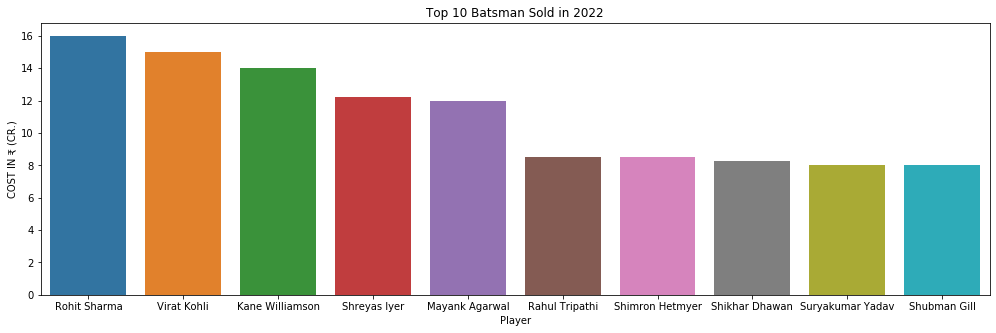

In [41]:
plt.figure(figsize=(17,5))
sns.barplot(x='Player',y='COST IN ₹ (CR.)',data=Top10_Batters_sold)
plt.title('Top 10 Batsman Sold in 2022',color='black')
plt.show()

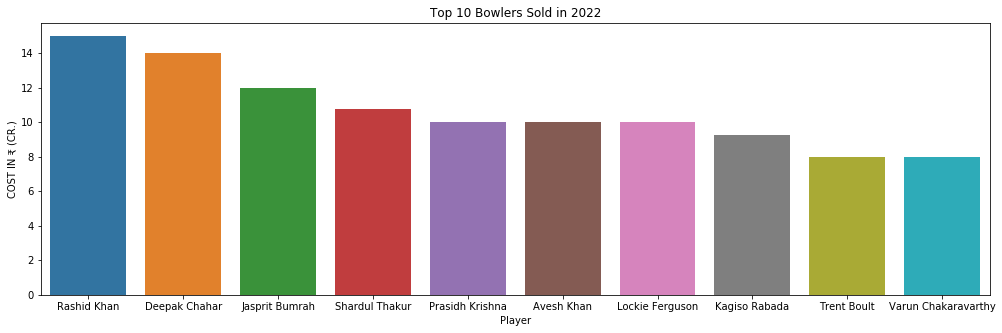

In [44]:
plt.figure(figsize=(17,5))
sns.barplot(data=Top10_Bowlers_sold,x='Player',y='COST IN ₹ (CR.)')
plt.title('Top 10 Bowlers Sold in 2022',color='black')
plt.show()

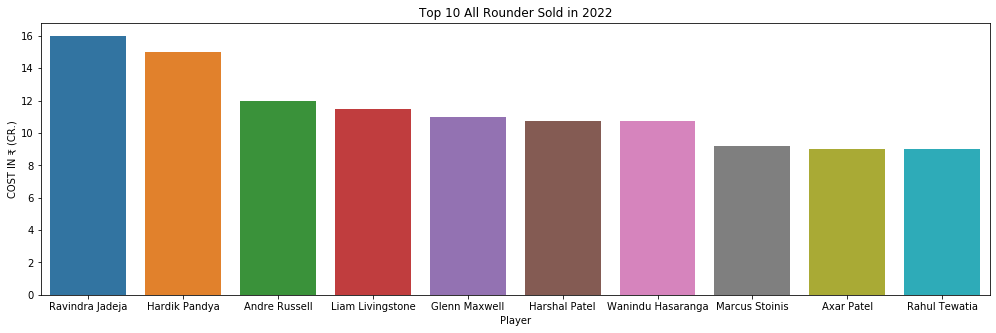

In [45]:
plt.figure(figsize=(17,5))
sns.barplot(x='Player',y='COST IN ₹ (CR.)',data=Top10_Rounder_sold)
plt.title('Top 10 All Rounder Sold in 2022',color='black')
plt.show()

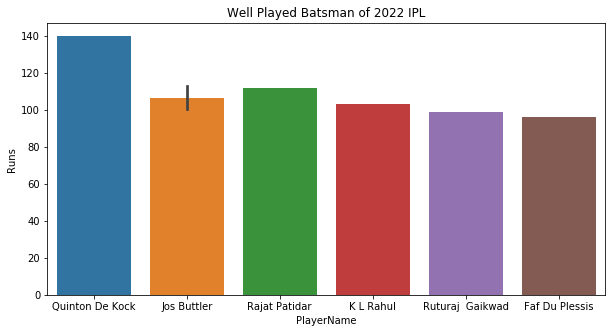

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(x='PlayerName',y='Runs',data=Top10_Batters)
plt.title('Well Played Batsman of 2022 IPL',color='black')
plt.show()

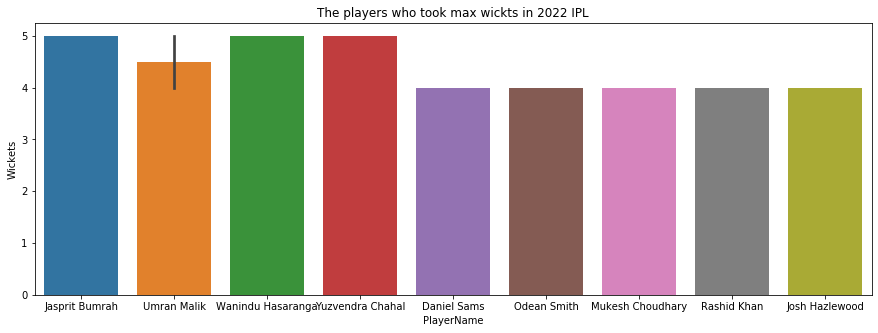

In [47]:
plt.figure(figsize=(15,5))
sns.barplot(x='PlayerName',y='Wickets',data=Top_10_Bowlers)
plt.title('The players who took max wickts in 2022 IPL',color='black')
plt.show()